# CMU Data Science Club Sustainability Datathon

**Team Name:** andrewID of team member submitting (only 1 member submits for entire team)

**Names:** include member submitting: Yizhou Wang, Daniel Ji, Yutai Long, Aidan Zhang

**Andrew IDs:** include member submitting: yizhouw3, andrew id 2, andrew id 3, ...

**This notebook is only for reference to help your team download the data and get started. Using this notebook is not required.**

In [1]:
### Load Some Common Packages ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules import lin_reg
from modules import design

We provide two datasets, you may use one or both or none (we encourage you to find your own datasets either entirely or supplementarily!). Refer to the dataset schemas - the column description tables in the instructions packet - to understand what information is contained in the datasets. Additionally, we have provided some guiding questions but feel free to go beyond those.

In [2]:
### Load the data ###
df_1 = pd.read_csv("data/large_scale_ai_models_added_cols.csv")
df_1.head()

,System,Domain,Task,Authors,Model accessibility,Link,Citations,Reference,Publication date,Organization,...,Finetune compute (FLOP),Finetune compute notes,Hardware quantity,Training code accessibility,Dataset accessibility,Accessibility notes,Organization categorization (from Organization),Training power (Watts),Training energy (kWh),Carbon Emissions from training (lb)
0,Firefly Video,Video,Video generation,Adobe,Hosted access (no API),https://news.adobe.com/news/2024/10/101424-ado...,NaN,Adobe Launches Firefly Video Model and Enhance...,2024-10-14,Adobe,...,NaN,NaN,NaN,NaN,NaN,NaN,Industry,3.300000e+14,NaN,NaN
1,Meta Movie Gen Video,Video,Video generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,6144.0,NaN,NaN,NaN,Industry,2.800000e+13,9.268000e+12,7.970480e+12
2,Meta Movie Gen Audio,Audio,Audio generation,"Adam Polyak, Amit Zohar, Andrew Brown, Andros ...",Unreleased,https://ai.meta.com/static-resource/movie-gen-...,NaN,Movie Gen: A Cast of Media Foundation Models,2024-10-04,Meta AI,...,NaN,NaN,384.0,NaN,NaN,NaN,Industry,3.470000e+13,1.248048e+13,1.073321e+13
3,Llama 3.2 3B,Language,"Language modelling/generation,Text summarizati...",NaN,Open weights (restricted use),https://ai.meta.com/blog/llama-3-2-connect-202...,NaN,Llama 3.2: Revolutionizing edge AI and vision ...,2024-09-24,Meta AI,...,NaN,NaN,NaN,Unreleased,NaN,LLAMA 3.2 COMMUNITY LICENSE AGREEMENT\n\nhttps...,Industry,1.600000e+15,NaN,NaN
4,Qwen2.5-72B,Language,Language modelling/generation,NaN,Open weights (unrestricted),https://qwenlm.github.io/blog/qwen2.5/,NaN,Qwen2.5: A Party of Foundation Models!,2024-09-19,Alibaba,...,NaN,NaN,NaN,Unreleased,Unreleased,license: allows commercial. weights only\nhttp...,Industry,1.210000e+14,NaN,NaN


In [ ]:
### Dataset 1 ###

In [20]:
## clean ##

In [3]:
df_1.isnull().sum()

System                                               0
Domain                                               0
Task                                                 0
Authors                                             91
Model accessibility                                 39
Link                                                 3
Citations                                          147
Reference                                           38
Publication date                                     0
Organization                                         0
Parameters                                          64
Parameters notes                                    86
Training compute (FLOP)                             94
Training compute notes                              79
Training dataset                                   109
Training dataset notes                             104
Training dataset size (datapoints)                 103
Dataset size notes                                 107
Training t

In [4]:
df_1 = df_1[['Country (from Organization)', 'Parameters', 'Training power (Watts) ']]

In [5]:
df_1.dropna(subset=['Training power (Watts) '], axis=0, inplace=True)
df_1.reset_index(drop=True, inplace=True)
df_1

,Country (from Organization),Parameters,Training power (Watts)
0,United States of America,NaN,3.300000e+14
1,United States of America,3.000000e+10,2.800000e+13
2,United States of America,1.300000e+10,3.470000e+13
3,United States of America,3.210000e+09,1.600000e+15
4,China,7.270000e+10,1.210000e+14
...,...,...,...
125,United States of America,2.300000e+09,6.280000e+13
126,United States of America,1.750000e+11,2.240000e+13
127,United States of America,2.600000e+09,6.820000e+13
128,United Kingdom of Great Britain and Northern I...,4.640024e+07,4.000000e+13


In [45]:
df_1_clean = df_1.dropna(subset=['Parameters'], axis=0)
df_1_clean.reset_index(drop=True, inplace=True)
df_1_clean

,Country (from Organization),Parameters,Training power (Watts)
0,United States of America,3.000000e+10,2.800000e+13
1,United States of America,1.300000e+10,3.470000e+13
2,United States of America,3.210000e+09,1.600000e+15
3,China,7.270000e+10,1.210000e+14
4,China,7.200000e+10,5.020000e+13
...,...,...,...
95,Israel,1.780000e+11,2.740000e+13
96,United States of America,2.300000e+09,6.280000e+13
97,United States of America,1.750000e+11,2.240000e+13
98,United States of America,2.600000e+09,6.820000e+13


In [54]:
df_1_clean = df_1_clean[df_1_clean['Country (from Organization)'] != 'Multinational']

In [56]:
#df_1_clean.to_csv("data/cleaned.csv", index=False)

In [6]:
df_1_clean = pd.read_csv("data/cleaned.csv")
df_1_clean

,Country (from Organization),Parameters,Training power (Watts)
0,USA,3.000000e+10,2.800000e+13
1,USA,1.300000e+10,3.470000e+13
2,USA,3.210000e+09,1.600000e+15
3,China,7.270000e+10,1.210000e+14
4,China,7.200000e+10,5.020000e+13
...,...,...,...
87,Israel,1.780000e+11,2.740000e+13
88,USA,2.300000e+09,6.280000e+13
89,USA,1.750000e+11,2.240000e+13
90,USA,2.600000e+09,6.820000e+13


In [7]:
by_country = df_1_clean.groupby('Country (from Organization)').mean()
by_country

,Parameters,Training power (Watts)
Country (from Organization),,
Canada,1.040000e+11,5.150000e+13
China,1.660355e+11,9.012138e+14
Germany,2.569885e+10,8.700000e+13
Hong Kong,4.366667e+10,1.180333e+14
Israel,1.780000e+11,2.740000e+13
Japan,1.050000e+10,8.650000e+14
Korea,1.754700e+11,8.168333e+13
Russia,1.000000e+11,7.930000e+13
UAE,9.550000e+10,1.223000e+14


In [8]:
by_country["Power Consumption Normalized by Model Size"] = by_country["Training power (Watts) "]/by_country["Parameters"]
by_country

,Parameters,Training power (Watts),Power Consumption Normalized by Model Size
Country (from Organization),,,
Canada,1.040000e+11,5.150000e+13,495.192308
China,1.660355e+11,9.012138e+14,5427.837417
Germany,2.569885e+10,8.700000e+13,3385.365726
Hong Kong,4.366667e+10,1.180333e+14,2703.053435
Israel,1.780000e+11,2.740000e+13,153.932584
Japan,1.050000e+10,8.650000e+14,82380.952381
Korea,1.754700e+11,8.168333e+13,465.511673
Russia,1.000000e+11,7.930000e+13,793.000000
UAE,9.550000e+10,1.223000e+14,1280.628272


In [85]:
#by_country.to_csv("results/set1/by_country.csv")

Text(0.5, 1.0, 'Training Power and Parameters by Country')

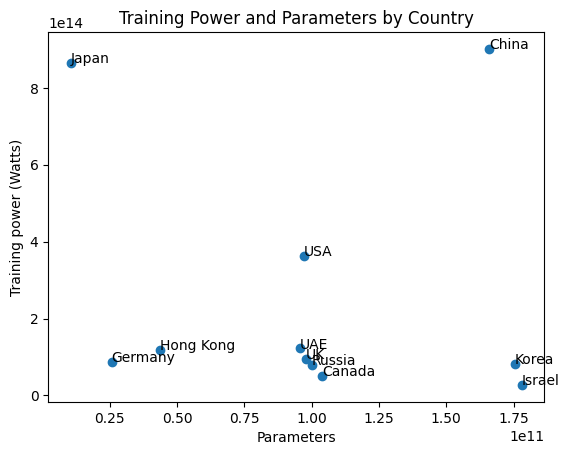

In [9]:
plt.scatter(by_country['Parameters'], by_country['Training power (Watts) '], label=by_country.index.tolist())
countries = by_country.index.tolist()
for i in range(by_country.shape[0]):
    plt.text(by_country.loc[countries[i], 'Parameters'], by_country.loc[countries[i], 'Training power (Watts) '],\
             countries[i], fontsize=10)
plt.xlabel("Parameters")
plt.ylabel("Training power (Watts)")
plt.title("Training Power and Parameters by Country")
#plt.savefig('results/set1/countries.png')

In [10]:
df_taxes = pd.read_csv("data/tax_scores.csv")
df_taxes

,Country,Carbon Tax Price (USD/ton),Tax Coverage,Tax Strength (out of 100)
0,Canada,58.94,40%,54.3138
1,USA,0.00,2%,1.9200
2,Argentina,0.81,38%,36.6987
3,Chile,5.00,55%,54.1500
4,Mexico,4.30,30%,29.9610
5,Colombia,6.67,20%,21.0009
6,Australia,21.90,26%,30.8730
7,Khazakstan,0.00,47%,45.1200
8,China,12.57,40%,41.7939
9,Indonesia,0.61,26%,25.1247


In [11]:
countries = by_country.index.tolist()
by_country["Tax Score"] = 0
for i in range(df_taxes.shape[0]):
    country = df_taxes.loc[i, 'Country']
    if country in countries:
        by_country.loc[country, 'Tax Score'] = df_taxes.loc[i, 'Tax Strength (out of 100)']
by_country

C:\Users\yizho\AppData\Local\Temp\ipykernel_3016\977656225.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '54.3138' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  by_country.loc[country, 'Tax Score'] = df_taxes.loc[i, 'Tax Strength (out of 100)']


,Parameters,Training power (Watts),Power Consumption Normalized by Model Size,Tax Score
Country (from Organization),,,,
Canada,1.040000e+11,5.150000e+13,495.192308,54.3138
China,1.660355e+11,9.012138e+14,5427.837417,41.7939
Germany,2.569885e+10,8.700000e+13,3385.365726,50.4999
Hong Kong,4.366667e+10,1.180333e+14,2703.053435,51.3840
Israel,1.780000e+11,2.740000e+13,153.932584,73.2000
Japan,1.050000e+10,8.650000e+14,82380.952381,11.0730
Korea,1.754700e+11,8.168333e+13,465.511673,101.7210
Russia,1.000000e+11,7.930000e+13,793.000000,45.5310
UAE,9.550000e+10,1.223000e+14,1280.628272,46.0320


In [12]:
X = pd.DataFrame({'Intercept' : 1, 'Tax Score' : by_country['Tax Score']})
Y = np.log(by_country['Power Consumption Normalized by Model Size'])
model = lin_reg.fit(X, Y)
model.summary()

C:\Users\yizho\Workspaces\Datathon\AI_sustain\AI_sustain_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     Power Consumption Normalized by Model Size   R-squared:                       0.516
Model:                                                    OLS   Adj. R-squared:                  0.462
Method:                                         Least Squares   F-statistic:                     9.602
Date:                                        Fri, 15 Nov 2024   Prob (F-statistic):             0.0128
Time:                                                09:24:16   Log-Likelihood:                -16.685
No. Observations:                                          11   AIC:                             37.37
Df Residuals:                                               9   BIC:                             38.17
Df Model:                                                   1                                         
Covariance Type:                                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6165      0.782     12.299      0.000       7.848      11.385
Tax Score     -0.0448      0.014     -3.099      0.013      -0.077      -0.012
==============================================================================
Omnibus:                        0.981   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.809
Skew:                           0.461   Prob(JB):                        0.667
Kurtosis:                       2.044   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

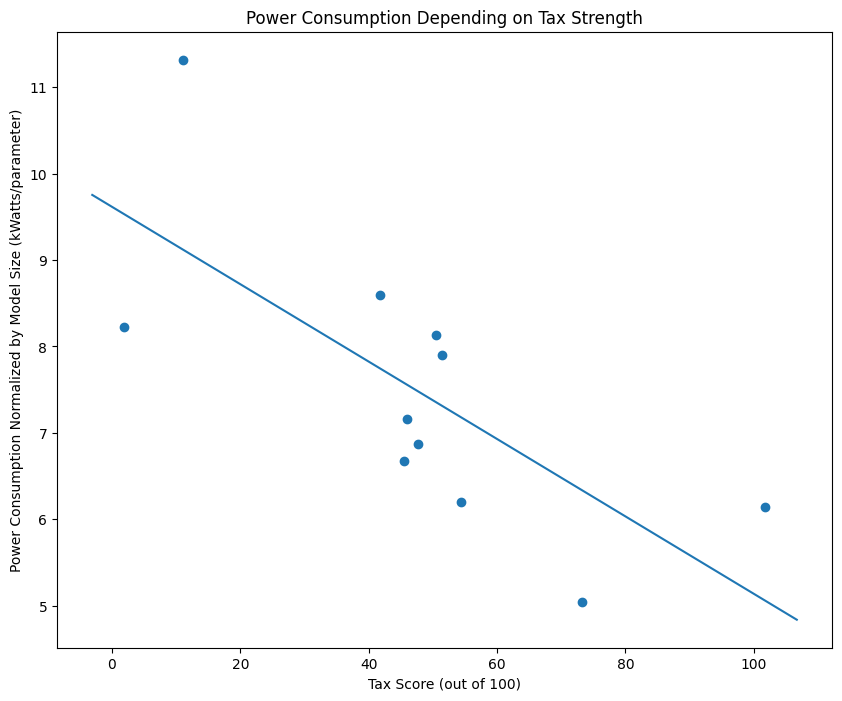

In [14]:
ax = plt.subplots(figsize=(10, 8))[1]
ax.scatter(by_country['Tax Score'], np.log(by_country['Power Consumption Normalized by Model Size']), label=by_country.index.tolist())
lin_reg.abfitline(ax, model)
ax.set_title("Power Consumption Depending on Tax Strength")
ax.set_xlabel('Tax Score (out of 100)')
ax.set_ylabel('Power Consumption Normalized by Model Size (kWatts/parameter)')
for i in range(by_country.shape[0]):
    plt.text(by_country.loc[i, 'Tax Score'], np.log(by_country.loc[i, 'Power Consumption Normalized by Model Size']) 'T,\
             countries[i], fontsize=10)
plt.savefig("results/set1/power_tax.png")

In [5]:
### Dataset 2 ###

In [21]:
df_2 = pd.read_csv("data/bloom_emissions.csv")
df_2.head()

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,python_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud
0,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,0.912916,0.000027,0.029840,0.0,418.779,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
1,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.000802,0.000029,0.029172,0.0,418.763,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
2,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.062332,0.000030,0.028206,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
3,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.110190,0.000031,0.027648,0.0,421.098,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N
4,2022-05-18T12:03:49,distilbert-base-uncased_random_wikitext_4,3d0c0253-711f-482e-b2fa-cf009acb467c,1.157329,0.000031,0.027152,0.0,425.624,70.345768,0.0,...,3.8.10,40.0,Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz,8.0,8 x NVIDIA GeForce RTX 3090,-72.9302,41.3186,187.588715,machine,N


In [6]:
## clean ##

In [22]:
df_2.drop(['timestamp','cpu_power', 'cpu_energy', 'cpu_count', 'gpu_count', \
           'cloud_provider', 'cloud_region', 'run_id', 'country_name', 'country_iso_code',\
          'region', 'os', 'python_version', 'cpu_model', 'gpu_model',\
          'longitude', 'latitude', 'ram_total_size', 'tracking_mode', 'on_cloud'], axis=1, inplace=True)
df_2 = df_2.dropna(axis=0).reset_index(drop=True)
df_2 = df_2[df_2['duration']>1000].dropna(axis=0).reset_index(drop=True)
df_2['emissions_rate'] = 1000*df_2['emissions_rate']

In [8]:
## EDA ##

In [89]:
df_2.describe()

,duration,emissions,emissions_rate,gpu_power,ram_power,gpu_energy,ram_energy,energy_consumed
count,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000
mean,1704.513338,0.033836,19.853324,409.990271,70.345768,0.133670,0.015980,0.149649
std,80.279499,0.001504,0.073885,164.430824,0.000000,0.005669,0.001056,0.006652
min,1489.559832,0.029924,19.721722,268.614000,70.345768,0.118697,0.013650,0.132347
25%,1645.367633,0.032738,19.792068,275.347500,70.345768,0.129609,0.015184,0.144792
50%,1720.930908,0.034172,19.855745,283.236000,70.345768,0.134848,0.016122,0.151136
75%,1768.661477,0.035025,19.904588,614.815750,70.345768,0.138153,0.016664,0.154911
max,1832.277324,0.036339,20.089019,644.936000,70.345768,0.143815,0.018057,0.160722


In [10]:
df_2[1000:1010]

,project_name,duration,emissions,emissions_rate,gpu_power,ram_power,gpu_energy,ram_energy,energy_consumed
1000,distilgpt2_random_wikitext_4,1615.213983,0.032197,19.933462,288.865,70.345768,0.127689,0.014711,0.142400
1001,distilgpt2_random_wikitext_4,1615.326362,0.032199,19.933333,288.240,70.345768,0.127696,0.014713,0.142409
1002,distilgpt2_random_wikitext_4,1615.437757,0.032201,19.933207,288.206,70.345768,0.127704,0.014715,0.142418
1003,distilgpt2_random_wikitext_4,1615.549944,0.032203,19.933076,288.205,70.345768,0.127711,0.014716,0.142427
1004,distilgpt2_random_wikitext_4,1615.662547,0.032205,19.932940,288.071,70.345768,0.127718,0.014718,0.142436
1005,distilgpt2_random_wikitext_4,1615.777503,0.032207,19.932784,287.883,70.345768,0.127725,0.014720,0.142445
1006,distilgpt2_random_wikitext_4,1615.890944,0.032209,19.932633,286.241,70.345768,0.127732,0.014722,0.142454
1007,distilgpt2_random_wikitext_4,1616.003513,0.032211,19.932491,285.590,70.345768,0.127740,0.014723,0.142463
1008,distilgpt2_random_wikitext_4,1616.115402,0.032213,19.932352,287.232,70.345768,0.127747,0.014725,0.142472
1009,distilgpt2_random_wikitext_4,1616.227410,0.032215,19.932218,287.713,70.345768,0.127754,0.014727,0.142481


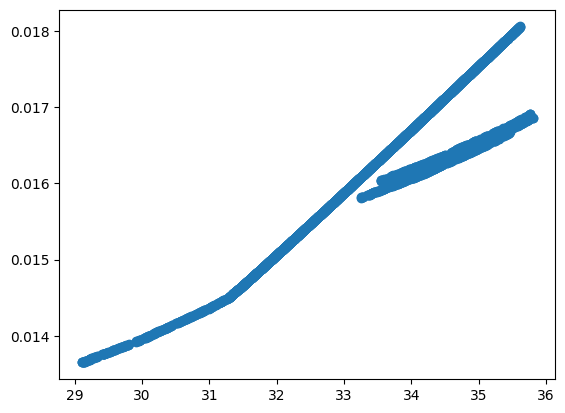

<Figure size 640x480 with 0 Axes>

In [11]:
plt.scatter(df_2['duration']*df_2['ram_power']/3600, df_2['ram_energy'])
plt.show()
plt.clf()

In [23]:
df_2_large = df_2.copy().drop(["project_name"], axis=1)
df_2.drop(['emissions', 'energy_consumed', 'gpu_energy', 'ram_energy'], axis=1, inplace=True)
df_2[1000:1010]

,project_name,duration,emissions_rate,gpu_power,ram_power
1000,distilgpt2_random_wikitext_4,1615.213983,19.933462,288.865,70.345768
1001,distilgpt2_random_wikitext_4,1615.326362,19.933333,288.240,70.345768
1002,distilgpt2_random_wikitext_4,1615.437757,19.933207,288.206,70.345768
1003,distilgpt2_random_wikitext_4,1615.549944,19.933076,288.205,70.345768
1004,distilgpt2_random_wikitext_4,1615.662547,19.932940,288.071,70.345768
1005,distilgpt2_random_wikitext_4,1615.777503,19.932784,287.883,70.345768
1006,distilgpt2_random_wikitext_4,1615.890944,19.932633,286.241,70.345768
1007,distilgpt2_random_wikitext_4,1616.003513,19.932491,285.590,70.345768
1008,distilgpt2_random_wikitext_4,1616.115402,19.932352,287.232,70.345768
1009,distilgpt2_random_wikitext_4,1616.227410,19.932218,287.713,70.345768


In [91]:
by_project_name = df_2.groupby('project_name').mean()
#by_project_name.to_csv('results/set2/by_project_name.csv')
by_project_name

,duration,emissions_rate,gpu_power,ram_power
project_name,,,,
distilbert-base-uncased_pretrained_wikitext_4,1767.101571,19.923243,617.431049,70.345768
distilbert-base-uncased_random_wikitext_4,1773.659714,19.836213,618.271887,70.345768
distilgpt2_pretrained_wikitext_4,1755.911376,19.843329,618.858714,70.345768
distilgpt2_random_wikitext_4,1683.379907,19.848617,337.085847,70.345768


In [14]:
## Fit Models ##

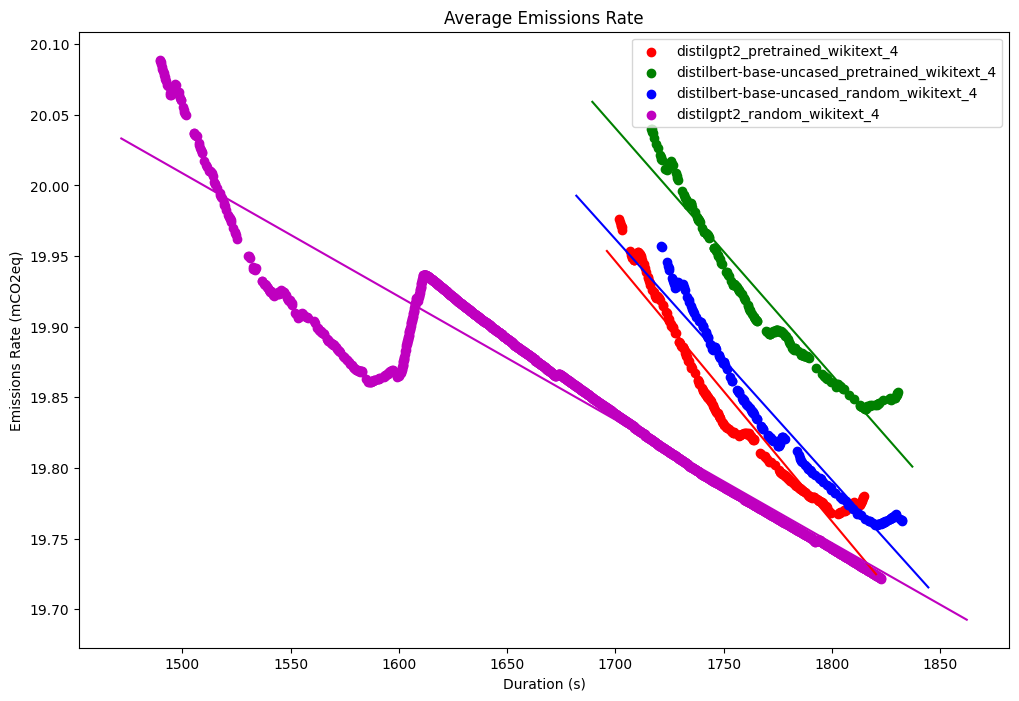

In [7]:
project_names = df_2['project_name'].unique()

models_summary = pd.DataFrame(index=project_names, columns=['R^2', 'slope'])

colors = ['r', 'g', 'b', 'm']
ax = plt.subplots(figsize=(12, 8))[1]
ax.set_xlabel("Duration (s)")
ax.set_ylabel("Emissions Rate (mCO2eq)")
ax.set_title('Average Emissions Rate')
for i in range(project_names.shape[0]):
    df_project = df_2[df_2['project_name']==project_names[i]].dropna().reset_index(drop=True)
    df_project = df_project.select_dtypes(include='float')
    model_project = lin_reg.fitOne(df_project, 'duration', 'emissions_rate')

    models_summary.loc[project_names[i], 'R^2'] = model_project.rsquared
    models_summary.loc[project_names[i], 'slope'] = model_project.params.iloc[1]
    
    ax.scatter(df_project['duration'], df_project['emissions_rate'], color=colors[i], label=project_names[i])
    lin_reg.abfitline(ax, model_project, color=colors[i])
ax.legend()

#plt.savefig("results/set2/emissions_duration.png")
plt.show()


In [8]:
models_summary
#models_summary.to_csv('results/set2/models_summary.csv')

,R^2,slope
distilgpt2_pretrained_wikitext_4,0.927421,-0.001842
distilbert-base-uncased_pretrained_wikitext_4,0.934591,-0.001748
distilbert-base-uncased_random_wikitext_4,0.945209,-0.001706
distilgpt2_random_wikitext_4,0.912011,-0.000873


In [9]:
df_project = df_2[df_2['project_name']==project_names[0]].dropna().reset_index(drop=True)
df_project = df_project.select_dtypes(include='float')
model_project = lin_reg.fitOne(df_project, 'duration', 'emissions_rate')

model_project.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         emissions_rate   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     3054.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          3.94e-138
Time:                        21:16:41   Log-Likelihood:                 647.76
No. Observations:                 241   AIC:                            -1292.
Df Residuals:                     239   BIC:                            -1285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.0771      0.059    394.309      0.000      22.962      23.192
duration      -0.0018   3.33e-05    -55.263      0.000      -0.002      -0.002
==============================================================================
Omnibus:                       17.430   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.445
Skew:                           0.677   Prob(JB):                     5.99e-05
Kurtosis:                       2.681   Cond. No.                     9.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X = design.msX(df_2_large, 'emissions_rate')
Y = design.msY(df_2_large, 'emissions_rate')
model_project = lin_reg.fit(X, Y)
model_project.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         emissions_rate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.847e+05
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:28:33   Log-Likelihood:                 10503.
No. Observations:                2468   AIC:                        -2.100e+04
Df Residuals:                    2463   BIC:                        -2.097e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.0040   4.83e-07   8333.083      0.000       0.004       0.004
duration           -0.0116   1.99e-05   -580.796      0.000      -0.012      -0.012
emissions          19.6315      0.045    438.481      0.000      19.544      19.719
gpu_power         1.57e-05   5.99e-07     26.201      0.000    1.45e-05    1.69e-05
ram_power           0.2834    3.4e-05   8333.083      0.000       0.283       0.283
gpu_energy         39.1448      0.108    361.381      0.000      38.932      39.357
ram_energy         47.6816      0.237    201.074      0.000      47.217      48.147
energy_consumed    86.8264      0.198    438.481      0.000      86.438      87.215
==============================================================================
Omnibus:                      930.528   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4748.365
Skew:                           1.727   Prob(JB):                         0.00
Kurtosis:                       8.853   Cond. No.                     6.04e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.09e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""